In [2]:
pip install tensorflow matplotlib numpy opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [4]:
# Konfigurasi direktori dataset
train_dir = r'C:\Users\Nicholas Sitorus\archive\Imagess\train'
val_dir = r'C:\Users\Nicholas Sitorus\archive\Imagess\validation'
test_dir = r'C:\Users\Nicholas Sitorus\archive\Imagess\test'

# Image data generator untuk augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load dataset
batch_size = 32
img_size = (48, 48)  # Ukuran gambar FER-2013

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'  # Menggunakan Grayscale
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'  # Menggunakan Grayscale
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'  # Menggunakan Grayscale
)


Found 28821 images belonging to 7 classes.
Found 3592 images belonging to 7 classes.
Found 7049 images belonging to 7 classes.


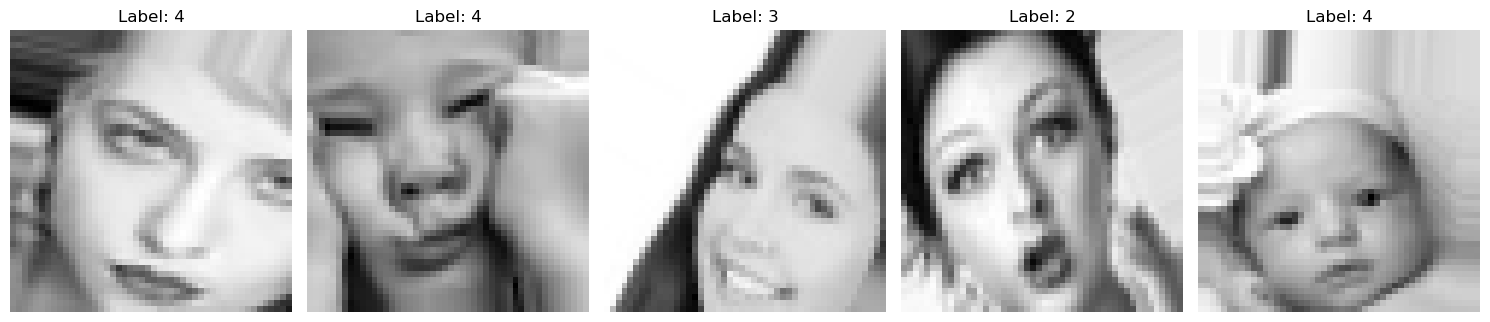

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch dari train_generator
images, labels = next(train_generator)

# Tentukan jumlah gambar yang ingin ditampilkan
num_images = 5

# Buat plot untuk menampilkan gambar
plt.figure(figsize=(15, 5))
for i in range(num_images):
    # Pilih indeks secara acak dari batch
    idx = np.random.randint(0, len(images))
    img = images[idx]
    label = labels[idx]

    # Subplot untuk setiap gambar
    plt.subplot(1, num_images, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')  # Gunakan cmap='gray' untuk grayscale
    plt.title(f"Label: {np.argmax(label)}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),  # Input shape untuk grayscale
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Jumlah kelas sesuai dataset
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)


C:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 104s 109ms/step - accuracy: 0.2262 - loss: 1.8320 - val_accuracy: 0.2625 - val_loss: 1.7688
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 67s 75ms/step - accuracy: 0.2521 - loss: 1.7909 - val_accuracy: 0.2973 - val_loss: 1.7207
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 68s 75ms/step - accuracy: 0.2705 - loss: 1.7546 - val_accuracy: 0.3090 - val_loss: 1.6836
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 68s 75ms/step - accuracy: 0.2991 - loss: 1.7118 - val_accuracy: 0.3463 - val_loss: 1.6424
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 68s 75ms/step - accuracy: 0.3322 - loss: 1.6603 - val_accuracy: 0.4165 - val_loss: 1.5122
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 68s 75ms/step - accuracy: 0.3590 - loss: 1.6145 - val_accuracy: 0.4446 - val_loss: 1.4334
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.3812 - loss: 1.5711 - val_accuracy: 0.4880 - val_loss: 1.3467
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 68s 75ms/step - accuracy: 0.4031 - loss: 1.5359 

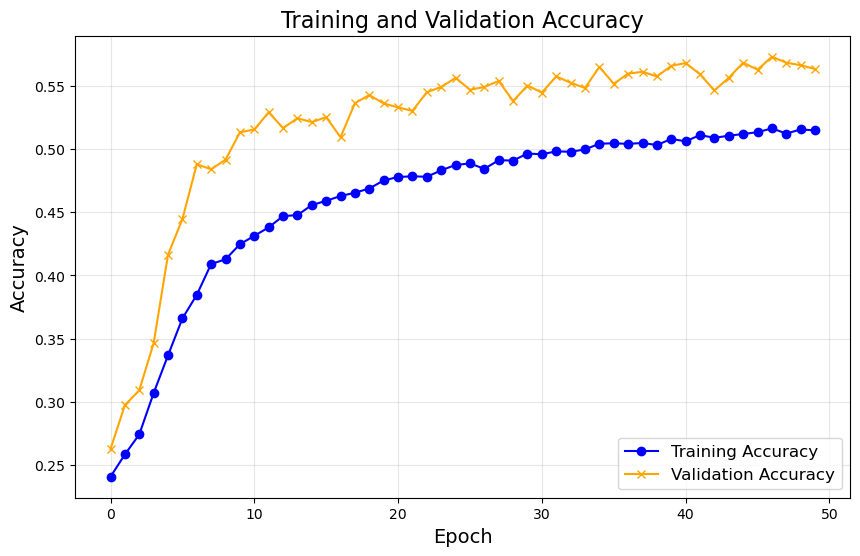

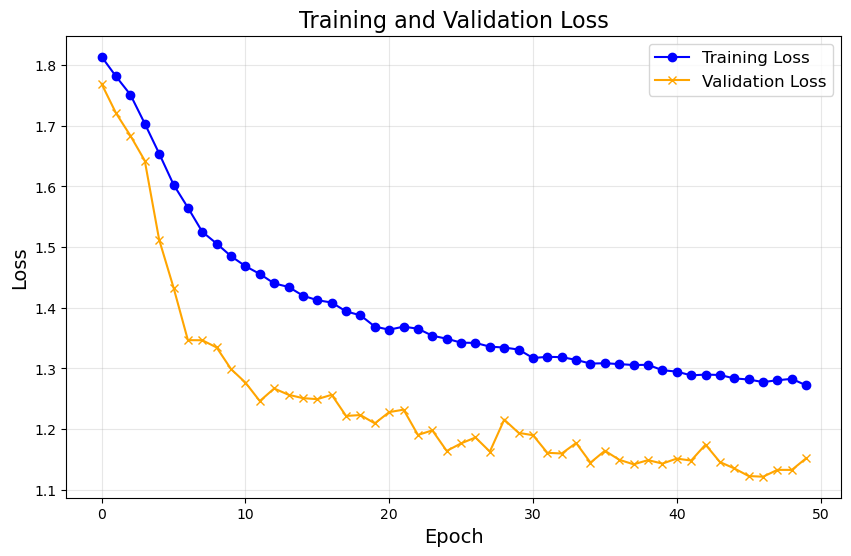

In [18]:
import matplotlib.pyplot as plt

# Grafik Akurasi
plt.figure(figsize=(10, 6))  # Ukuran grafik
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='x')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)  # Tambahkan grid untuk panduan visual
plt.show()

# Grafik Loss
plt.figure(figsize=(10, 6))  # Ukuran grafik
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='x')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.3)  # Tambahkan grid untuk panduan visual
plt.show()


C:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


221/221 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step


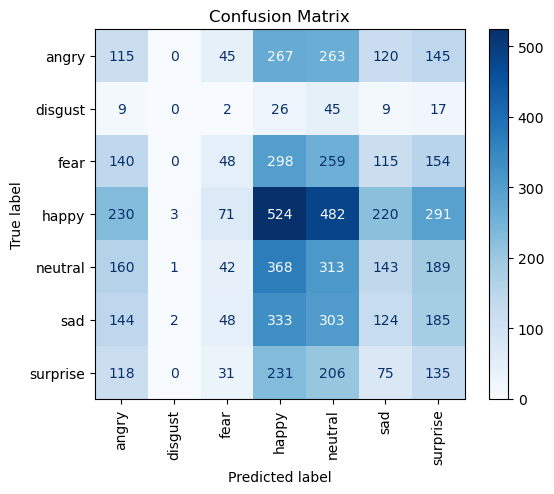

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi data uji
y_pred_prob = model.predict(test_generator)  # Menghasilkan probabilitas kelas
y_pred = np.argmax(y_pred_prob, axis=1)      # Mengambil kelas dengan probabilitas tertinggi

# Mendapatkan label sebenarnya dari test_generator
y_true = test_generator.classes  # Label sebenarnya dari test_generator
class_labels = list(test_generator.class_indices.keys())  # Mendapatkan nama kelas

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


In [22]:
model.save('facial_expression_model.keras')


In [24]:
from tensorflow.keras.models import load_model
model = load_model('facial_expression_model.keras')


In [26]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_emotion(image_path, model, class_labels):
    # Load image with size 48x48 for prediction in grayscale mode
    img = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Grayscale mode
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to the range [0, 1]
    
    # Add batch dimension (1, 48, 48, 1)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]
    
    # Convert confidence to percentage
    confidence_percentage = confidence * 100
    
    return class_labels[predicted_class], confidence_percentage


In [28]:
class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [30]:
from IPython.display import display
from ipywidgets import FileUpload

# Unggah file
upload = FileUpload(accept='image/*', multiple=False)
display(upload)



FileUpload(value=(), accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


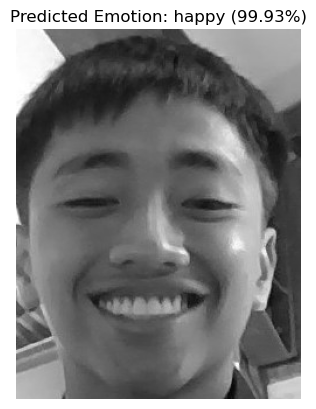

In [32]:
import matplotlib.pyplot as plt
from PIL import Image

if upload.value:
    uploaded_file = upload.value[0]  # Directly access the first element of the tuple
    with open('uploaded_image.jpg', 'wb') as f:
        f.write(uploaded_file['content'])

    # Prediksi gambar yang diunggah
    predicted_label, confidence = predict_emotion('uploaded_image.jpg', model, class_labels)

    # Tampilkan gambar dan hasil prediksi
    img = Image.open('uploaded_image.jpg')
    plt.imshow(img, cmap='gray')  # Display in grayscale
    plt.axis('off')  # Hide axes
    plt.title(f'Predicted Emotion: {predicted_label} ({confidence:.2f}%)')
    plt.show()
